# Final Project Part 2 - Exploratory Data Analysis

## 1. Import Python Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
%matplotlib inline

## 2. Load Data to DataFrame

In [3]:
la_airbnbs = pd.read_csv('../data/la_airbnb_retail_listings.csv', low_memory = False)

## 3. Explornig the Dataset

In [4]:
# Number of rows and columns in our data
la_airbnbs.shape

(31253, 95)

In [5]:
# Summary of our data
la_airbnbs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31253 entries, 0 to 31252
Data columns (total 95 columns):
id                                  31253 non-null int64
listing_url                         31253 non-null object
scrape_id                           31253 non-null int64
last_scraped                        31253 non-null object
name                                31246 non-null object
summary                             30417 non-null object
space                               21866 non-null object
description                         31238 non-null object
experiences_offered                 31253 non-null object
neighborhood_overview               18575 non-null object
notes                               13815 non-null object
transit                             18164 non-null object
access                              19074 non-null object
interaction                         18262 non-null object
house_rules                         22047 non-null object
thumbnail_url          

In [6]:
# Data types for each column
la_airbnbs.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                      

In [7]:
# List of names of our columns
la_airbnbs.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

We have 95 columns with 31253 entries.  Many of the columns are repetitive or not helpful information that we can use to build our model.  We'll drop the non useful columns and create a new dataset from the remaining columns. 

In [8]:
# Creating a new dataset with only the columns we think will be useful
cleaned_la_airbnbs = la_airbnbs.drop(['host_has_profile_pic', 'thumbnail_url', 'host_url',
                                      'medium_url', 'picture_url', 'xl_picture_url', 'host_picture_url',
                                     'listing_url', 'weekly_price', 'monthly_price', 'host_thumbnail_url',
                                     'scrape_id', 'latitude', 'longitude', 'host_response_rate', 'requires_license',
                                     'require_guest_profile_picture', 'jurisdiction_names', 'last_scraped', 'summary', 
                                     'description', 'name', 'neighbourhood', 'state', 'country',
                                      'market', 'license', 'first_review', 'last_review', 'calendar_last_scraped',
                                     'neighbourhood_group_cleansed', 'host_about', 'house_rules', 'country_code',
                                     'street', 'transit', 'access', 'space', 'notes', 'interaction',
                                     'smart_location', 'calendar_updated', 'experiences_offered',
                                     'neighborhood_overview', 'host_acceptance_rate', 'host_location',
                                     'host_neighbourhood', 'host_response_time', 'host_name'], axis = 'columns')

In [9]:
# Rows and Columns for the new dataset
cleaned_la_airbnbs.shape

(31253, 46)

In [10]:
# Name of columns from new dataset
cleaned_la_airbnbs.columns

Index(['id', 'host_id', 'host_since', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_identity_verified',
       'neighbourhood_cleansed', 'city', 'zipcode', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'square_feet', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'cancellation_policy', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'reviews_per_month'],
     

In [11]:
# Checking to see how many columns have missing information
cleaned_la_airbnbs.isna().sum()

id                                      0
host_id                                 0
host_since                             14
host_is_superhost                      14
host_listings_count                    14
host_total_listings_count              14
host_verifications                      0
host_identity_verified                 14
neighbourhood_cleansed                  0
city                                   11
zipcode                               395
is_location_exact                       0
property_type                           0
room_type                               0
accommodates                            0
bathrooms                              97
bedrooms                               35
beds                                   59
bed_type                                0
amenities                               0
square_feet                         30869
price                                   0
security_deposit                    14397
cleaning_fee                      

Convert string 'price' into numerical value float type

In [12]:
# Clean 'price' and convert to numeric value.
cleaned_la_airbnbs.loc[:, 'price'] = cleaned_la_airbnbs.loc[:, 'price'].replace('[\$,]', '', regex=True).astype(float)

In [13]:
# Checking to see a random sample of city names to best devise a plan to fill missing information.
cleaned_la_airbnbs.loc[:, ['neighbourhood_cleansed', 'city', 'zipcode']].sample(40)

,neighbourhood_cleansed,city,zipcode
1328,Playa del Rey,Los Angeles,90293
22413,Santa Monica,Santa Monica,90401
23161,Santa Monica,Santa Monica,90401
13775,La Verne,La Verne,91750
18110,Montecito Heights,Los Angeles,90031
869,Arleta,Los Angeles,91331
16923,Mid-City,Los Angeles,90034
859,Arcadia,Monrovia,91016
27557,Venice,Los Angeles,90291
11592,Hollywood Hills,Los Angeles,90068


In [14]:
# Looking for one off 'zipcode' entries that might have been misentered.
cleaned_la_airbnbs.loc[:, 'zipcode'].value_counts()

90291         1733
90046         1367
90028         1094
90026          980
90036          839
90068          718
90066          690
90027          571
90038          552
90292          530
90025          526
90069          518
90019          512
90048          510
90024          440
90034          432
90265          426
90004          387
90029          372
91748          362
90039          346
90006          344
90012          334
90035          332
91601          327
90802          312
90042          307
90405          299
90017          291
91604          263
              ... 
90929            1
91764            1
90840            1
91606-1412       1
90630            1
92629            1
92880            1
91308            1
90035-4475       1
90625            1
93105            1
91708            1
90039-2715       1
Near 91304       1
90005-3747       1
92397            1
10023            1
92821            1
90403-2638       1
999041           1
91001-2243       1
9004        

After looking at our data we notice that 'neighbourhood_cleansed', 'city', 'zipcode' are all very similar information.  We want to use zipcodes as they are in a numerical format already, but some of that data is missing, entered incorrectly or entered in a different format.  We also notice that 'neighbourhood_cleansed' has no missing fields and is a more specific location that our 'city' column.  

Location of the rental could be a factor in the setting of the price we should fill these items in correctly.


We will now import another dataset that contains a zipcode lookup table for all zipcodes in the United States.  We'll hopefully be able to use 'neighbourhood_cleansed' to cross reference the new zipcode dataset to located our missing or incorrectly entered zipcodes.

In [15]:
# Load up the new zipcodes dataset
zipcodes = pd.read_csv('../data/zips/uszips.csv', low_memory = False)

In [16]:
# Rows and columns for new dataset
zipcodes.shape

(33099, 16)

In [17]:
# Random sample of inputs to get an idea of how the data is entered.
zipcodes.sample(5)

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,all_county_weights,imprecise,military,timezone
8425,27315,36.50523,-79.39273,Providence,NC,North Carolina,True,NaN,2243,32.8,37033,Caswell,{'37033':100},False,False,America/New_York
7982,25690,37.68964,-82.12434,Ragland,WV,West Virginia,True,NaN,249,54.8,54059,Mingo,{'54059':100},False,False,America/New_York
31405,95545,40.28037,-124.06367,Honeydew,CA,California,True,NaN,153,1.2,6023,Humboldt,{'06023':100},False,False,America/Los_Angeles
14028,43718,40.00942,-81.00089,Belmont,OH,Ohio,True,NaN,3209,23.2,39013,Belmont,{'39013':100},False,False,America/New_York
24084,69360,42.69944,-102.47170,Rushville,NE,Nebraska,True,NaN,1361,1.3,31161,Sheridan,{'31161':100},False,False,America/Denver


In [18]:
# Checking against one of our missing 'zipcode' entries from our 'cleaned_la_airbnb' dataset
zipcodes[(zipcodes.loc[:, 'city'] == 'Hollywood') & (zipcodes.loc[:, 'state_id'] == 'CA')]

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,all_county_weights,imprecise,military,timezone


In [19]:
# Checking a known 'zipcode' from 'cleaned_la_airbnb' against the new 'zipcodes' dataset
zipcodes[(zipcodes.loc[:, 'zip'] == 90028)]

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,all_county_weights,imprecise,military,timezone
30019,90028,34.09989,-118.32692,Los Angeles,CA,California,True,NaN,28714,7273.3,6037,Los Angeles,{'06037':100},False,False,America/Los_Angeles


In [20]:
zipcodes[zipcodes.loc[:, 'city'] == 'Sherman Oaks']

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,all_county_weights,imprecise,military,timezone
30234,91403,34.14659,-118.46286,Sherman Oaks,CA,California,True,NaN,23484,2497.2,6037,Los Angeles,{'06037':100},False,False,America/Los_Angeles
30238,91423,34.14852,-118.43272,Sherman Oaks,CA,California,True,NaN,30991,2742.5,6037,Los Angeles,{'06037':100},False,False,America/Los_Angeles


We will be attempting to fix all invalid entries for 'zipcode', using the other dataset as well as other entries we all aready have.

In [21]:
# Look at each row in our 'cleaned_la_airbnbs' dataset, then look for only rows that have invalid entries for 'zipcode', which we are stating as zipcodes that aren't 5 digits long or NaN.
for zip_index, zip_row in cleaned_la_airbnbs.iterrows():
    if (isinstance(cleaned_la_airbnbs.loc[zip_index, 'zipcode'], str) and len(cleaned_la_airbnbs.loc[zip_index, 'zipcode']) != 5) or (isinstance(cleaned_la_airbnbs.loc[zip_index, 'zipcode'], float)):
        # If we can find a matching zipcode for the 'neighbourhood_cleansed' as a valid 'city' in 'zipcodes' dataset then we'll take that zipcode.
        if len(zipcodes[(zipcodes.loc[:, 'state_id'] == 'CA') & (zipcodes.loc[:, 'city'] == zip_row['neighbourhood_cleansed'])].index) > 0:
            cleaned_la_airbnbs.loc[zip_index, 'zipcode'] = zipcodes[(zipcodes.loc[:, 'state_id'] == 'CA') & (zipcodes.loc[:, 'city'] == cleaned_la_airbnbs.loc[zip_index, 'neighbourhood_cleansed'])]['zip'].iloc[0]
        # Otherwise lets search our own 'cleaned_la_airbnbs' dataset for an exisiting listing with a zipcode and use that.
        else:
            for city_index, city_row in cleaned_la_airbnbs.iterrows():
                if zip_row['neighbourhood_cleansed'] == city_row['neighbourhood_cleansed']:
                    cleaned_la_airbnbs.loc[zip_index, 'zipcode'] = city_row['zipcode']
                    break
            # If that still doesn't yeild a valid entry we'll try using 'city' instead of 'neighbourhood_cleansed' as a search parameter.  We do this last because all search results will yeild Los Angeles.
            if len(zipcodes[(zipcodes.loc[:, 'state_id'] == 'CA') & (zipcodes.loc[:, 'city'] == zip_row['city'])].index) > 0:
                cleaned_la_airbnbs.loc[zip_index, 'zipcode'] = zipcodes[(zipcodes.loc[:, 'state_id'] == 'CA') & (zipcodes.loc[:, 'city'] == cleaned_la_airbnbs.loc[zip_index, 'city'])]['zip'].iloc[0]

cleaned_la_airbnbs.loc[:, 'zipcode'] = cleaned_la_airbnbs.loc[:, 'zipcode'].astype(int)

#### Create our initial Linear Regression model

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

target_col = 'price'
y = cleaned_la_airbnbs.loc[:, target_col]

feature_cols = ['zipcode']
X = cleaned_la_airbnbs.loc[:, feature_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.score(X_test, y_test))
print(linreg.score(X_train, y_train))

0.0009885884452847105
0.0005802889405541745


Initial pass with only 'zipcode' yielded very poor results.  We'll need to look for more/better features.

We will now look at a few different columns to get an idea of what our data looks like and how we can use it.  If a column has null enteries how would we like to handle that.  Should we fill in or drop the rows completely.

In [23]:
# Clean 'cleaning_fee' and convert to numeric value.
cleaned_la_airbnbs.loc[:, 'cleaning_fee'] = cleaned_la_airbnbs.loc[:, 'cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)

In [24]:
cleaned_la_airbnbs.loc[:, 'cleaning_fee'].dropna().mean()

75.67502780180403

In [25]:
cleaned_la_airbnbs.loc[:, 'bedrooms'].dropna().mean()

1.3501185213658786

In [26]:
cleaned_la_airbnbs.loc[:, 'bedrooms'].fillna(value = 1.0, inplace = True)

In [27]:
cleaned_la_airbnbs.loc[:, 'beds'].dropna().mean()

1.8889850612297236

In [28]:
cleaned_la_airbnbs.loc[:, 'beds'].fillna(value = 2.0, inplace = True)

In [29]:
cleaned_la_airbnbs.loc[:, 'review_scores_rating'].dropna().mean()

94.21453258029166

In [30]:
cleaned_la_airbnbs.loc[:, 'review_scores_rating'].isna().sum()

7527

In [31]:
cleaned_la_airbnbs.loc[:, 'host_is_superhost'].value_counts()

f    24892
t     6347
Name: host_is_superhost, dtype: int64

Text(0.5, 0, 'Cost of cleaning fee')

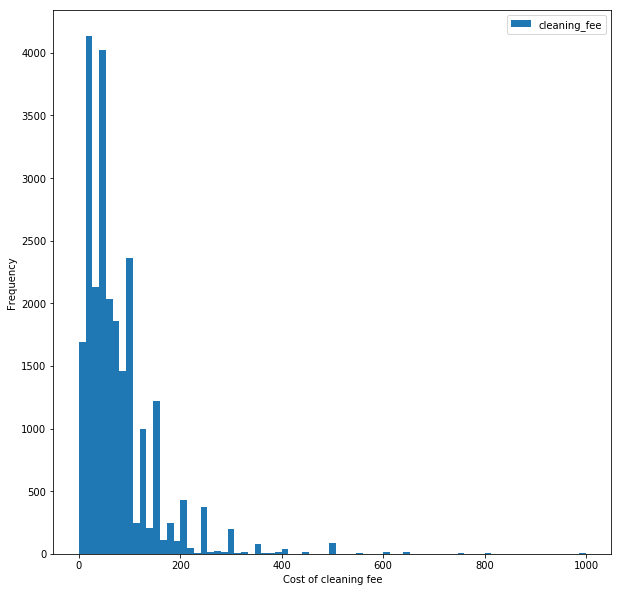

In [32]:
ax = cleaned_la_airbnbs.loc[:, ['cleaning_fee']].plot(kind = 'hist', bins = 75, figsize = (10, 10))
ax.set_xlabel('Cost of cleaning fee')

Text(0.5, 0, 'Number of people')

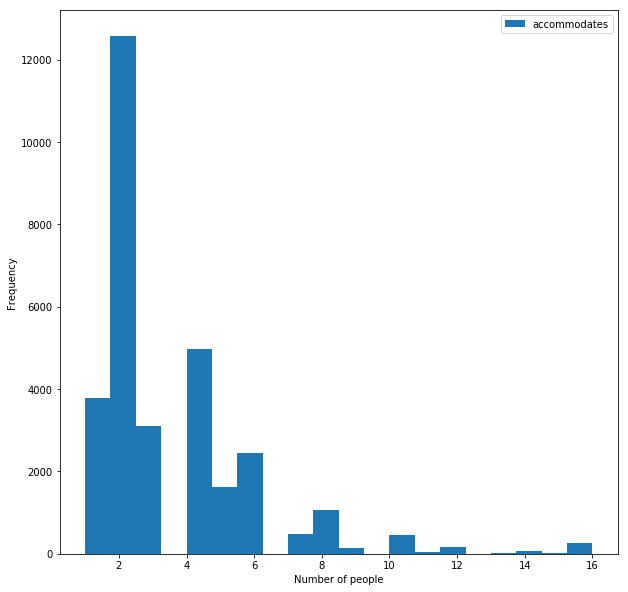

In [33]:
ax = cleaned_la_airbnbs.loc[:, ['accommodates']].plot(kind = 'hist', bins = 20, figsize = (10, 10))
ax.set_xlabel('Number of people')

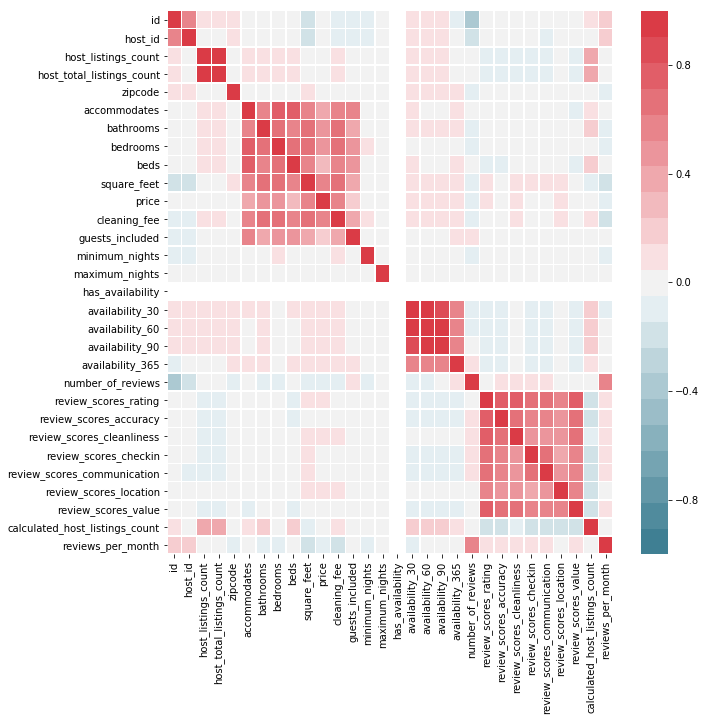

In [34]:
# Heatmap of correlation matrix for 'cleaned_la_airbnbs'
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(cleaned_la_airbnbs.corr(),vmin=-1,
            vmax=1,cmap=sns.diverging_palette(h_neg=220, h_pos=10, n=21), linewidths=.5, ax=ax);

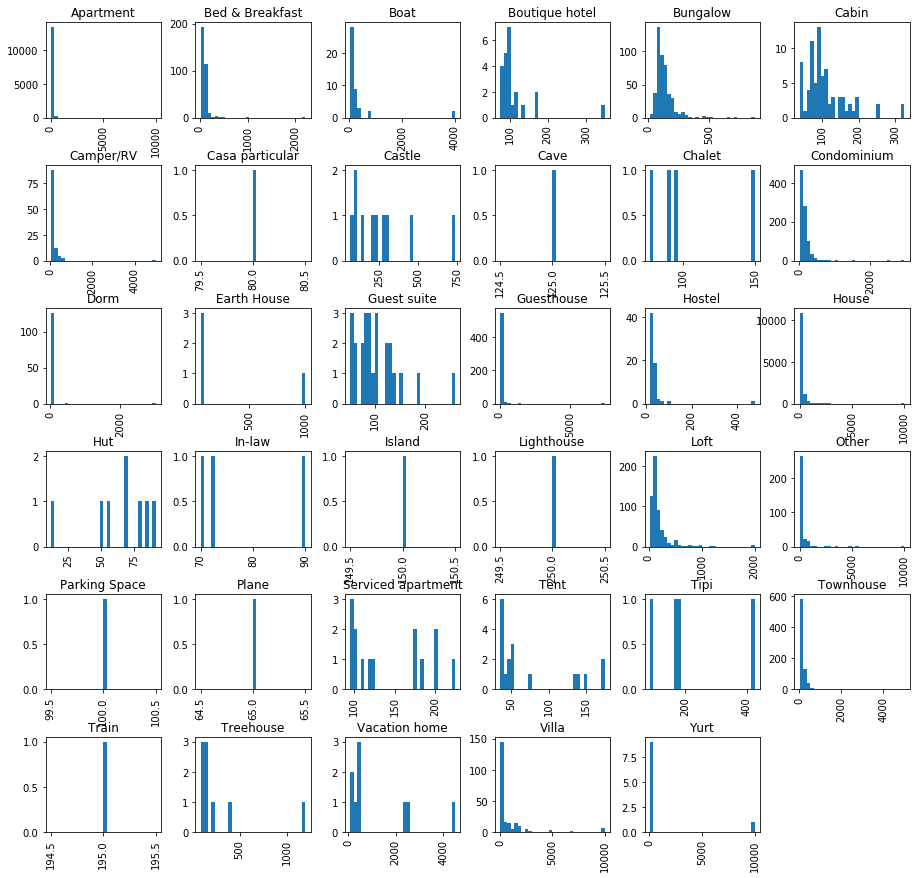

In [35]:
# Plot the different types of housing verses the price of rental
ax = cleaned_la_airbnbs.hist(column='price', by='property_type', figsize=(15, 15), bins = 30)

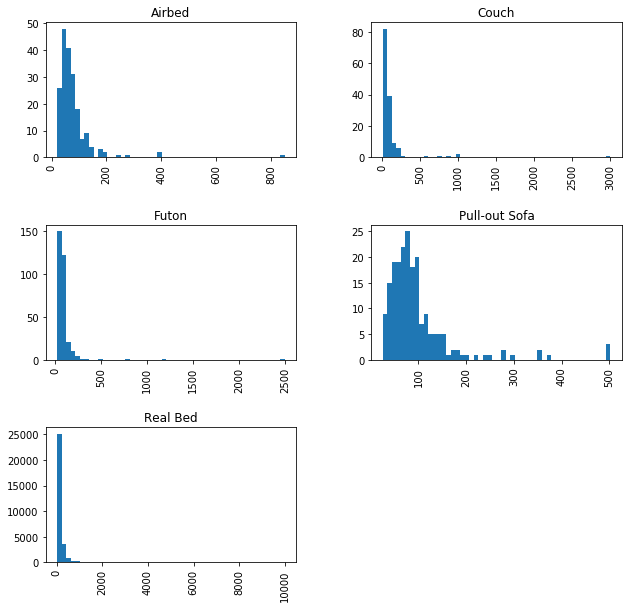

In [36]:
# Plot the different types of bedding verses the price of rental
ax = cleaned_la_airbnbs.hist(column='price', by='bed_type', figsize=(10, 10), bins = 50)

Check scatter plots of bedrooms and beds to see if there are outliers that might be throwing our model.

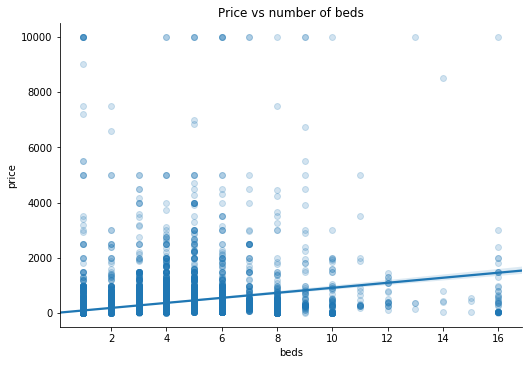

In [37]:
g = sns.lmplot(x = 'beds', y = 'price', data = cleaned_la_airbnbs, aspect = 1.5, scatter_kws = {'alpha' : .2})
g.ax.set_title('Price vs number of beds');

In [38]:
cleaned_la_airbnbs.loc[:, 'beds'].value_counts(ascending = True)

15.0        3
13.0        4
14.0        5
11.0       17
12.0       19
16.0       44
9.0        58
10.0       86
7.0       151
8.0       162
6.0       444
5.0       730
4.0      1677
3.0      3116
2.0      6915
1.0     17822
Name: beds, dtype: int64

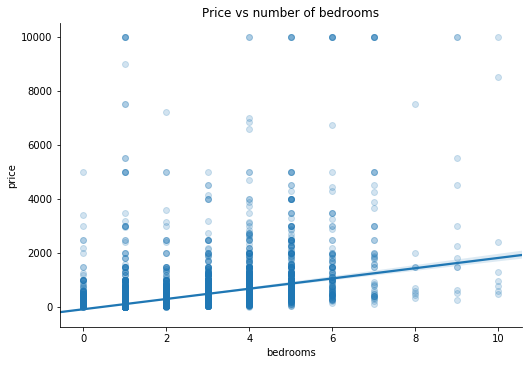

In [39]:
g = sns.lmplot(x = 'bedrooms', y = 'price', data = cleaned_la_airbnbs, aspect = 1.5, scatter_kws = {'alpha' : .2})
g.ax.set_title('Price vs number of bedrooms');

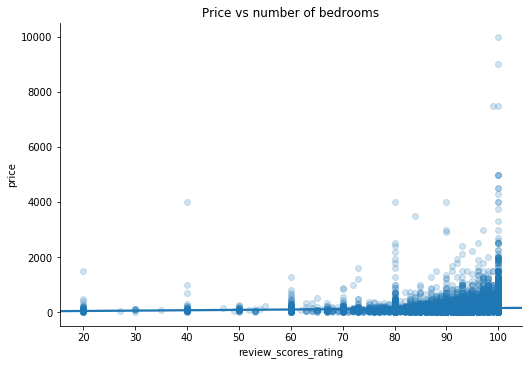

In [40]:
g = sns.lmplot(x = 'review_scores_rating', y = 'price', data = cleaned_la_airbnbs, aspect = 1.5, scatter_kws = {'alpha' : .2})
g.ax.set_title('Price vs number of bedrooms');

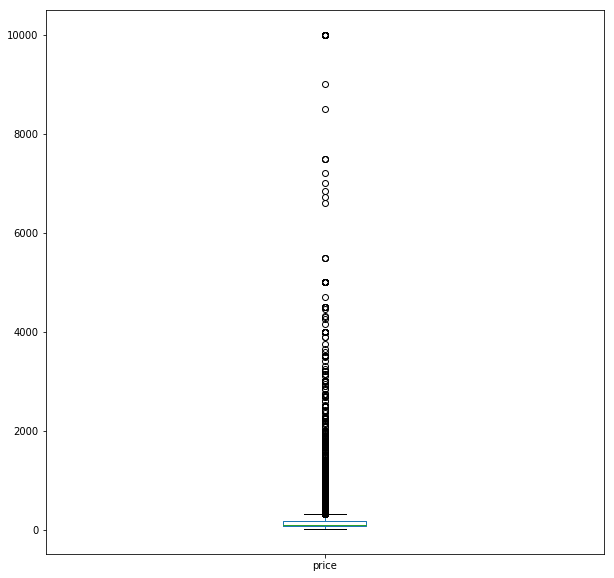

In [41]:
ax = cleaned_la_airbnbs.loc[:, 'price'].plot(kind='box',figsize=(10, 10))

Data seems to have a few housings with very high rental prices, this could be an entry mistake or very large mansions that could throw our model off.  Better to drop these rows to better fit our model.  Also going to create another dataframe where we drop 'review_scores_rating' instead of filling it to an average score which could throw our model off.

In [42]:
# Define a function that searches for outliers based off z_score.
# Credit belongs to Renu Khandelwal.
def find_outliers(dataseries):
    mean = np.mean(dataseries)
    std = np.std(dataseries)
    threshold = 3
    outliers = []
    
    for data in dataseries:
        z_score = (data - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(data)
    return(outliers)

In [43]:
prices = cleaned_la_airbnbs.loc[:, 'price']

In [44]:
# Use the function we defined earlier on to find price outliers and then the min function to get the lowest price of our outliers
price_outliers = find_outliers(prices)
print(min(price_outliers))

1448.0


In [45]:
# Drop all rows that are higher than our lowest outlier and create a new dataset
no_outliers_la_airbnb = cleaned_la_airbnbs[cleaned_la_airbnbs.loc[:, 'price'] <= 1448]

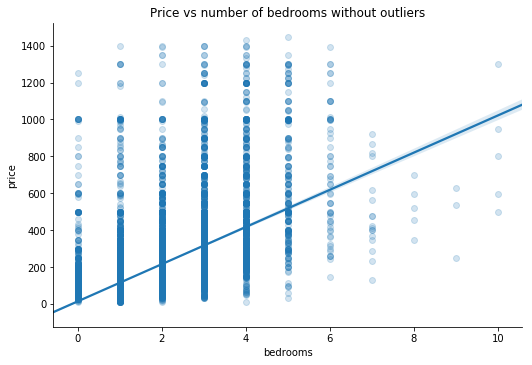

In [46]:
# New scatter plot without the outliers
g = sns.lmplot(x = 'bedrooms', y = 'price', data = no_outliers_la_airbnb, aspect = 1.5, scatter_kws = {'alpha' : .2})
g.ax.set_title('Price vs number of bedrooms without outliers');

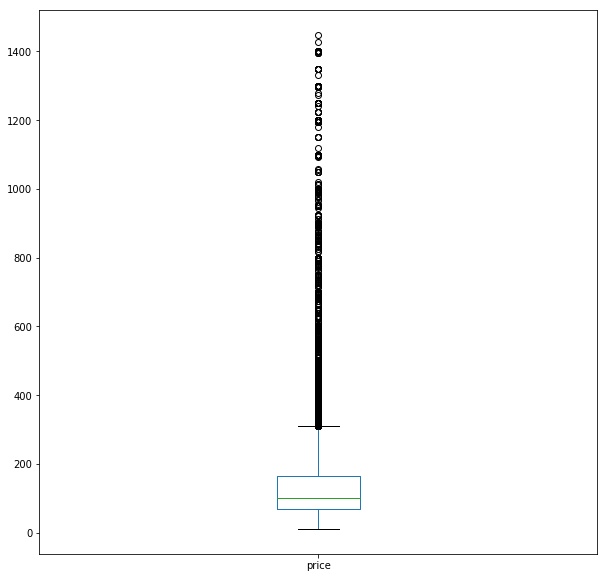

In [47]:
ax = no_outliers_la_airbnb.loc[:, 'price'].plot(kind='box',figsize=(10, 10))

In [48]:
# New Linear Regression model without our 'price' outliers
target_col = 'price'
y = no_outliers_la_airbnb.loc[:, target_col]

feature_cols = ['zipcode', 'bedrooms']
X = no_outliers_la_airbnb.loc[:, feature_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.score(X_test, y_test))
print(linreg.score(X_train, y_train))

0.3482454361374968
0.3940055233298939


In [49]:
# Create a new dataset by dropping rows with missing review scores.
drop_rating_no_outliers_la_airbnb = no_outliers_la_airbnb.dropna(subset = ['review_scores_rating'])

In [50]:
target_col = 'price'
y = drop_rating_no_outliers_la_airbnb.loc[:, target_col]

feature_cols = ['zipcode', 'bedrooms']
X = drop_rating_no_outliers_la_airbnb.loc[:, feature_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.score(X_test, y_test))
print(linreg.score(X_train, y_train))

0.4220708941679045
0.418466985491812


In [51]:
# Define a function that accepts a list of features and returns testing RMSE.
def train_test_rmse(df, target_col, feature_cols):
    y = df.loc[:, target_col]
    X = df.loc[:, feature_cols]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    return(np.sqrt(mse))

In [52]:
print(train_test_rmse(cleaned_la_airbnbs, 'price', ['zipcode', 'bedrooms']))
print(train_test_rmse(no_outliers_la_airbnb, 'price', ['zipcode', 'bedrooms']))
print(train_test_rmse(drop_rating_no_outliers_la_airbnb, 'price', ['zipcode', 'bedrooms']))

426.03877954811435
124.16185120418865
100.85837376300573


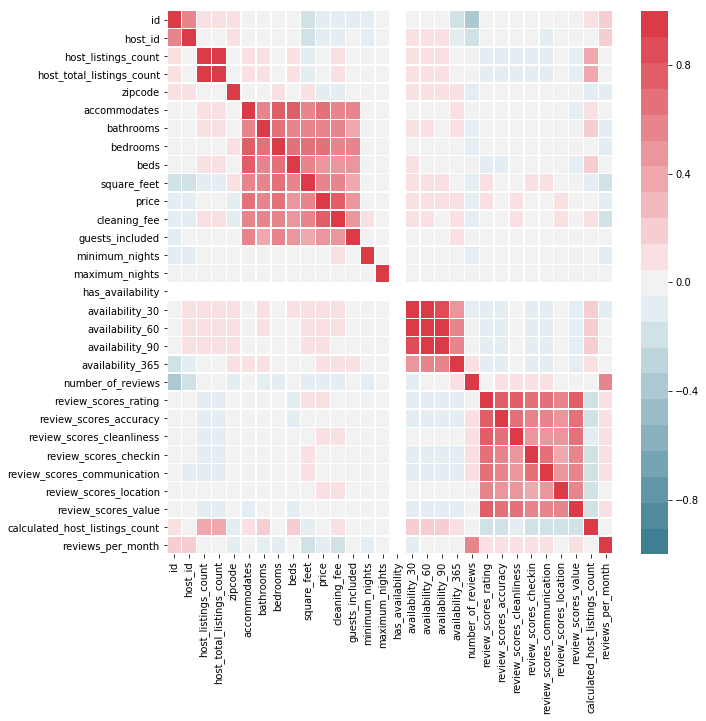

In [53]:
# Heatmap of correlation matrix
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(drop_rating_no_outliers_la_airbnb.corr(),vmin=-1,
            vmax=1,cmap=sns.diverging_palette(h_neg=220, h_pos=10, n=21), linewidths=.5, ax=ax);

We can see that by dropping the outlying AirBnB prices we have come up with a much better model.  Dropping the listings that don't have reviews also seemed to have made our model better.  With less data points we have made our model better.  We should further inspect that data we dropped to see what is causing our model to drop drastically with those rows included.

# 4. Summary

- From our initial dataset of 31253 rows and 95 columns we have dropped down to 23633 and 46 columns.  This has better improved our prediction model.
- Our data has both numerical and non-numerical values.  
    - Through some work we can change the non-numerical values into useful features.
    - We can create new columns by creating dummy variables for certain features, such as 'room_type'
- We have missing or misenterned data for some of our possible features, but there are ways to be able to fill them in correctly or we could drop them in order to better fit our model.
- We seem to be underfitting our data, the more features we give it yeild better results.

# 5. Conclusion

Even though we were able to significantly improve our model I have become skeptical that our data will be able to produce a suitable predictive model.  Many of our possible features seem to be heavy correlated to one another which would prevent us from better fitting our model.  Hopes are if we clean up a few of the other features to become numerical values or create dummy variables we can add to the complexity of our data and yeild a better fitted model.